## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 0.01

In [4]:
# Parameters
variance = 0.01


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7        X8        X9       X10       X11       X12       X13         Y
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 



In [8]:
batch_size = 100
n_epochs = 5000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.036765


0:	learn: 0.9793830	total: 48.2ms	remaining: 48.1s
1:	learn: 0.9582303	total: 49.2ms	remaining: 24.5s
2:	learn: 0.9353695	total: 50ms	remaining: 16.6s
3:	learn: 0.9161608	total: 50.8ms	remaining: 12.7s
4:	learn: 0.8990488	total: 51.6ms	remaining: 10.3s
5:	learn: 0.8832373	total: 52.7ms	remaining: 8.73s
6:	learn: 0.8650817	total: 53.6ms	remaining: 7.6s
7:	learn: 0.8477194	total: 54.4ms	remaining: 6.75s
8:	learn: 0.8311338	total: 55.3ms	remaining: 6.09s
9:	learn: 0.8132347	total: 56.2ms	remaining: 5.56s
10:	learn: 0.7953546	total: 57.1ms	remaining: 5.13s
11:	learn: 0.7796915	total: 57.9ms	remaining: 4.76s
12:	learn: 0.7641617	total: 58.7ms	remaining: 4.46s
13:	learn: 0.7484061	total: 59.5ms	remaining: 4.19s
14:	learn: 0.7353909	total: 60.3ms	remaining: 3.96s
15:	learn: 0.7199546	total: 61.1ms	remaining: 3.76s
16:	learn: 0.7058790	total: 62ms	remaining: 3.58s
17:	learn: 0.6928959	total: 62.8ms	remaining: 3.42s
18:	learn: 0.6802797	total: 63.6ms	remaining: 3.28s
19:	learn: 0.6666222	total:

118:	learn: 0.2751476	total: 148ms	remaining: 1.09s
119:	learn: 0.2742685	total: 149ms	remaining: 1.09s
120:	learn: 0.2732505	total: 150ms	remaining: 1.09s
121:	learn: 0.2722779	total: 151ms	remaining: 1.08s
122:	learn: 0.2706818	total: 152ms	remaining: 1.08s
123:	learn: 0.2699505	total: 152ms	remaining: 1.08s
124:	learn: 0.2691699	total: 153ms	remaining: 1.07s
125:	learn: 0.2678759	total: 154ms	remaining: 1.07s
126:	learn: 0.2667829	total: 155ms	remaining: 1.06s
127:	learn: 0.2658124	total: 156ms	remaining: 1.06s
128:	learn: 0.2648855	total: 157ms	remaining: 1.06s
129:	learn: 0.2641466	total: 157ms	remaining: 1.05s
130:	learn: 0.2633410	total: 158ms	remaining: 1.05s
131:	learn: 0.2621334	total: 159ms	remaining: 1.05s
132:	learn: 0.2614823	total: 160ms	remaining: 1.04s
133:	learn: 0.2601560	total: 161ms	remaining: 1.04s
134:	learn: 0.2595334	total: 161ms	remaining: 1.03s
135:	learn: 0.2587113	total: 162ms	remaining: 1.03s
136:	learn: 0.2582149	total: 163ms	remaining: 1.03s
137:	learn: 

165:	learn: 0.2366878	total: 187ms	remaining: 940ms
166:	learn: 0.2363036	total: 188ms	remaining: 937ms
167:	learn: 0.2355500	total: 189ms	remaining: 935ms
168:	learn: 0.2349215	total: 190ms	remaining: 932ms
169:	learn: 0.2341849	total: 191ms	remaining: 930ms
170:	learn: 0.2335247	total: 191ms	remaining: 928ms
171:	learn: 0.2330065	total: 192ms	remaining: 925ms
172:	learn: 0.2326195	total: 193ms	remaining: 923ms
173:	learn: 0.2319223	total: 194ms	remaining: 920ms
174:	learn: 0.2313989	total: 195ms	remaining: 918ms
175:	learn: 0.2306230	total: 196ms	remaining: 916ms
176:	learn: 0.2299509	total: 196ms	remaining: 913ms
177:	learn: 0.2293964	total: 197ms	remaining: 911ms
178:	learn: 0.2288240	total: 198ms	remaining: 909ms
179:	learn: 0.2283193	total: 199ms	remaining: 907ms
180:	learn: 0.2276200	total: 200ms	remaining: 904ms
181:	learn: 0.2270094	total: 201ms	remaining: 902ms
182:	learn: 0.2265258	total: 202ms	remaining: 900ms
183:	learn: 0.2260137	total: 202ms	remaining: 897ms
184:	learn: 

283:	learn: 0.1789390	total: 285ms	remaining: 719ms
284:	learn: 0.1785633	total: 286ms	remaining: 718ms
285:	learn: 0.1781925	total: 287ms	remaining: 717ms
286:	learn: 0.1777819	total: 288ms	remaining: 715ms
287:	learn: 0.1773282	total: 289ms	remaining: 714ms
288:	learn: 0.1769502	total: 290ms	remaining: 712ms
289:	learn: 0.1766256	total: 290ms	remaining: 711ms
290:	learn: 0.1762818	total: 291ms	remaining: 709ms
291:	learn: 0.1759812	total: 292ms	remaining: 708ms
292:	learn: 0.1756654	total: 293ms	remaining: 707ms
293:	learn: 0.1753518	total: 294ms	remaining: 705ms
294:	learn: 0.1750510	total: 294ms	remaining: 704ms
295:	learn: 0.1746660	total: 295ms	remaining: 702ms
296:	learn: 0.1743698	total: 296ms	remaining: 701ms
297:	learn: 0.1741036	total: 297ms	remaining: 699ms
298:	learn: 0.1738863	total: 298ms	remaining: 698ms
299:	learn: 0.1735892	total: 298ms	remaining: 696ms
300:	learn: 0.1731943	total: 299ms	remaining: 695ms
301:	learn: 0.1728469	total: 300ms	remaining: 694ms
302:	learn: 

330:	learn: 0.1629712	total: 324ms	remaining: 656ms
331:	learn: 0.1624494	total: 325ms	remaining: 655ms
332:	learn: 0.1620981	total: 326ms	remaining: 653ms
333:	learn: 0.1618328	total: 327ms	remaining: 652ms
334:	learn: 0.1614792	total: 328ms	remaining: 651ms
335:	learn: 0.1611670	total: 329ms	remaining: 649ms
336:	learn: 0.1607130	total: 329ms	remaining: 648ms
337:	learn: 0.1604204	total: 330ms	remaining: 647ms
338:	learn: 0.1601258	total: 331ms	remaining: 645ms
339:	learn: 0.1598547	total: 332ms	remaining: 644ms
340:	learn: 0.1595338	total: 333ms	remaining: 643ms
341:	learn: 0.1591560	total: 334ms	remaining: 642ms
342:	learn: 0.1588241	total: 334ms	remaining: 640ms
343:	learn: 0.1584322	total: 335ms	remaining: 639ms
344:	learn: 0.1581554	total: 336ms	remaining: 638ms
345:	learn: 0.1579230	total: 337ms	remaining: 637ms
346:	learn: 0.1576617	total: 338ms	remaining: 635ms
347:	learn: 0.1574751	total: 338ms	remaining: 634ms
348:	learn: 0.1571365	total: 339ms	remaining: 633ms
349:	learn: 

448:	learn: 0.1334275	total: 422ms	remaining: 518ms
449:	learn: 0.1332987	total: 423ms	remaining: 517ms
450:	learn: 0.1331067	total: 424ms	remaining: 516ms
451:	learn: 0.1328279	total: 425ms	remaining: 515ms
452:	learn: 0.1325780	total: 425ms	remaining: 514ms
453:	learn: 0.1323446	total: 426ms	remaining: 513ms
454:	learn: 0.1320852	total: 427ms	remaining: 512ms
455:	learn: 0.1318339	total: 428ms	remaining: 511ms
456:	learn: 0.1315433	total: 429ms	remaining: 510ms
457:	learn: 0.1313653	total: 430ms	remaining: 509ms
458:	learn: 0.1311582	total: 431ms	remaining: 507ms
459:	learn: 0.1311057	total: 431ms	remaining: 506ms
460:	learn: 0.1308018	total: 432ms	remaining: 505ms
461:	learn: 0.1305158	total: 433ms	remaining: 504ms
462:	learn: 0.1303462	total: 434ms	remaining: 503ms
463:	learn: 0.1302185	total: 434ms	remaining: 502ms
464:	learn: 0.1299137	total: 435ms	remaining: 501ms
465:	learn: 0.1297525	total: 436ms	remaining: 500ms
466:	learn: 0.1295942	total: 437ms	remaining: 499ms
467:	learn: 

493:	learn: 0.1243378	total: 461ms	remaining: 472ms
494:	learn: 0.1240792	total: 463ms	remaining: 472ms
495:	learn: 0.1238442	total: 464ms	remaining: 471ms
496:	learn: 0.1235879	total: 464ms	remaining: 470ms
497:	learn: 0.1234208	total: 465ms	remaining: 469ms
498:	learn: 0.1231217	total: 466ms	remaining: 468ms
499:	learn: 0.1229870	total: 467ms	remaining: 467ms
500:	learn: 0.1227567	total: 468ms	remaining: 466ms
501:	learn: 0.1226643	total: 469ms	remaining: 465ms
502:	learn: 0.1224801	total: 470ms	remaining: 464ms
503:	learn: 0.1223190	total: 471ms	remaining: 463ms
504:	learn: 0.1221077	total: 471ms	remaining: 462ms
505:	learn: 0.1219576	total: 472ms	remaining: 461ms
506:	learn: 0.1218548	total: 473ms	remaining: 460ms
507:	learn: 0.1216641	total: 474ms	remaining: 459ms
508:	learn: 0.1214343	total: 475ms	remaining: 458ms
509:	learn: 0.1212732	total: 475ms	remaining: 457ms
510:	learn: 0.1211052	total: 476ms	remaining: 456ms
511:	learn: 0.1208910	total: 477ms	remaining: 455ms
512:	learn: 

609:	learn: 0.1052296	total: 560ms	remaining: 358ms
610:	learn: 0.1050978	total: 561ms	remaining: 357ms
611:	learn: 0.1049759	total: 562ms	remaining: 356ms
612:	learn: 0.1047950	total: 563ms	remaining: 355ms
613:	learn: 0.1046790	total: 564ms	remaining: 354ms
614:	learn: 0.1045934	total: 565ms	remaining: 353ms
615:	learn: 0.1045011	total: 566ms	remaining: 353ms
616:	learn: 0.1042943	total: 566ms	remaining: 352ms
617:	learn: 0.1041832	total: 567ms	remaining: 351ms
618:	learn: 0.1039080	total: 568ms	remaining: 350ms
619:	learn: 0.1037869	total: 569ms	remaining: 349ms
620:	learn: 0.1035367	total: 570ms	remaining: 348ms
621:	learn: 0.1033841	total: 571ms	remaining: 347ms
622:	learn: 0.1031655	total: 572ms	remaining: 346ms
623:	learn: 0.1030696	total: 572ms	remaining: 345ms
624:	learn: 0.1029540	total: 573ms	remaining: 344ms
625:	learn: 0.1027401	total: 574ms	remaining: 343ms
626:	learn: 0.1026158	total: 575ms	remaining: 342ms
627:	learn: 0.1023986	total: 576ms	remaining: 341ms
628:	learn: 

655:	learn: 0.0984249	total: 599ms	remaining: 314ms
656:	learn: 0.0982410	total: 600ms	remaining: 313ms
657:	learn: 0.0980422	total: 601ms	remaining: 312ms
658:	learn: 0.0979537	total: 602ms	remaining: 312ms
659:	learn: 0.0978566	total: 603ms	remaining: 311ms
660:	learn: 0.0977789	total: 604ms	remaining: 310ms
661:	learn: 0.0975704	total: 605ms	remaining: 309ms
662:	learn: 0.0973971	total: 605ms	remaining: 308ms
663:	learn: 0.0972629	total: 606ms	remaining: 307ms
664:	learn: 0.0971872	total: 607ms	remaining: 306ms
665:	learn: 0.0969158	total: 608ms	remaining: 305ms
666:	learn: 0.0967571	total: 609ms	remaining: 304ms
667:	learn: 0.0966064	total: 610ms	remaining: 303ms
668:	learn: 0.0964459	total: 610ms	remaining: 302ms
669:	learn: 0.0963611	total: 611ms	remaining: 301ms
670:	learn: 0.0961664	total: 612ms	remaining: 300ms
671:	learn: 0.0959440	total: 613ms	remaining: 299ms
672:	learn: 0.0957466	total: 614ms	remaining: 298ms
673:	learn: 0.0956514	total: 615ms	remaining: 297ms
674:	learn: 

766:	learn: 0.0841950	total: 697ms	remaining: 212ms
767:	learn: 0.0841282	total: 698ms	remaining: 211ms
768:	learn: 0.0840619	total: 699ms	remaining: 210ms
769:	learn: 0.0839081	total: 700ms	remaining: 209ms
770:	learn: 0.0837202	total: 701ms	remaining: 208ms
771:	learn: 0.0835524	total: 702ms	remaining: 207ms
772:	learn: 0.0834207	total: 703ms	remaining: 206ms
773:	learn: 0.0833597	total: 704ms	remaining: 205ms
774:	learn: 0.0832641	total: 705ms	remaining: 205ms
775:	learn: 0.0831532	total: 706ms	remaining: 204ms
776:	learn: 0.0831184	total: 707ms	remaining: 203ms
777:	learn: 0.0830331	total: 708ms	remaining: 202ms
778:	learn: 0.0829601	total: 709ms	remaining: 201ms
779:	learn: 0.0828086	total: 710ms	remaining: 200ms
780:	learn: 0.0826788	total: 711ms	remaining: 199ms
781:	learn: 0.0825667	total: 712ms	remaining: 199ms
782:	learn: 0.0824181	total: 713ms	remaining: 198ms
783:	learn: 0.0823330	total: 714ms	remaining: 197ms
784:	learn: 0.0822373	total: 715ms	remaining: 196ms
785:	learn: 

805:	learn: 0.0804313	total: 733ms	remaining: 176ms
806:	learn: 0.0802978	total: 734ms	remaining: 176ms
807:	learn: 0.0802387	total: 735ms	remaining: 175ms
808:	learn: 0.0801072	total: 736ms	remaining: 174ms
809:	learn: 0.0799547	total: 737ms	remaining: 173ms
810:	learn: 0.0798502	total: 738ms	remaining: 172ms
811:	learn: 0.0798206	total: 739ms	remaining: 171ms
812:	learn: 0.0797762	total: 740ms	remaining: 170ms
813:	learn: 0.0795790	total: 741ms	remaining: 169ms
814:	learn: 0.0794840	total: 742ms	remaining: 168ms
815:	learn: 0.0793834	total: 742ms	remaining: 167ms
816:	learn: 0.0793158	total: 743ms	remaining: 166ms
817:	learn: 0.0792219	total: 744ms	remaining: 166ms
818:	learn: 0.0790540	total: 745ms	remaining: 165ms
819:	learn: 0.0789521	total: 746ms	remaining: 164ms
820:	learn: 0.0788686	total: 747ms	remaining: 163ms
821:	learn: 0.0786589	total: 748ms	remaining: 162ms
822:	learn: 0.0785698	total: 749ms	remaining: 161ms
823:	learn: 0.0784177	total: 750ms	remaining: 160ms
824:	learn: 

917:	learn: 0.0699883	total: 832ms	remaining: 74.3ms
918:	learn: 0.0699332	total: 833ms	remaining: 73.4ms
919:	learn: 0.0698475	total: 834ms	remaining: 72.5ms
920:	learn: 0.0697426	total: 835ms	remaining: 71.6ms
921:	learn: 0.0696181	total: 835ms	remaining: 70.7ms
922:	learn: 0.0694964	total: 836ms	remaining: 69.8ms
923:	learn: 0.0694349	total: 837ms	remaining: 68.9ms
924:	learn: 0.0693576	total: 838ms	remaining: 67.9ms
925:	learn: 0.0692736	total: 839ms	remaining: 67ms
926:	learn: 0.0692230	total: 840ms	remaining: 66.1ms
927:	learn: 0.0690717	total: 840ms	remaining: 65.2ms
928:	learn: 0.0689558	total: 841ms	remaining: 64.3ms
929:	learn: 0.0688445	total: 842ms	remaining: 63.4ms
930:	learn: 0.0687669	total: 843ms	remaining: 62.5ms
931:	learn: 0.0686594	total: 844ms	remaining: 61.6ms
932:	learn: 0.0685558	total: 845ms	remaining: 60.7ms
933:	learn: 0.0684595	total: 846ms	remaining: 59.8ms
934:	learn: 0.0683523	total: 847ms	remaining: 58.9ms
935:	learn: 0.0682573	total: 847ms	remaining: 57

962:	learn: 0.0658268	total: 870ms	remaining: 33.4ms
963:	learn: 0.0657279	total: 871ms	remaining: 32.5ms
964:	learn: 0.0656477	total: 872ms	remaining: 31.6ms
965:	learn: 0.0655809	total: 873ms	remaining: 30.7ms
966:	learn: 0.0655116	total: 874ms	remaining: 29.8ms
967:	learn: 0.0654445	total: 875ms	remaining: 28.9ms
968:	learn: 0.0653442	total: 876ms	remaining: 28ms
969:	learn: 0.0652869	total: 877ms	remaining: 27.1ms
970:	learn: 0.0652557	total: 878ms	remaining: 26.2ms
971:	learn: 0.0652081	total: 878ms	remaining: 25.3ms
972:	learn: 0.0651396	total: 879ms	remaining: 24.4ms
973:	learn: 0.0651023	total: 880ms	remaining: 23.5ms
974:	learn: 0.0650096	total: 881ms	remaining: 22.6ms
975:	learn: 0.0649243	total: 882ms	remaining: 21.7ms
976:	learn: 0.0647928	total: 883ms	remaining: 20.8ms
977:	learn: 0.0647539	total: 884ms	remaining: 19.9ms
978:	learn: 0.0646302	total: 884ms	remaining: 19ms
979:	learn: 0.0645675	total: 885ms	remaining: 18.1ms
980:	learn: 0.0644549	total: 886ms	remaining: 17.2

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [10]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [11]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [12]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

#### Sanity Checks 

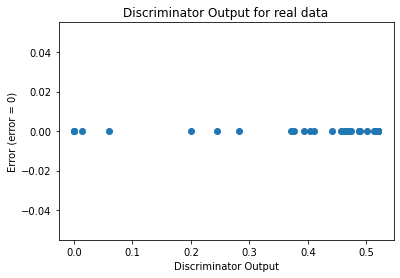

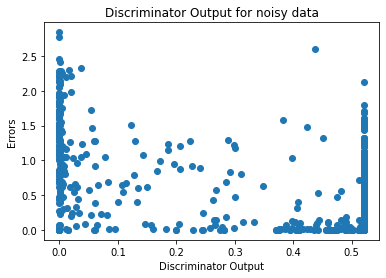

In [13]:
sanityChecks.discProbVsError(real_dataset,disc,device)

# ABC - GAN Model with skip connection

In [14]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [15]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [16]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

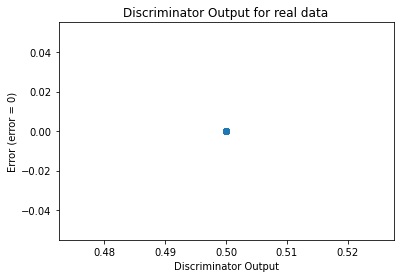

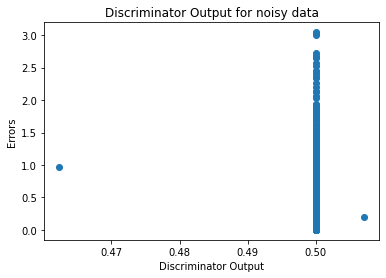

In [17]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [18]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0230]], device='cuda:0', requires_grad=True)
